# Mall Customers - Segmentation

In [1]:
#Importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#Importing the datasets
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_df = mall.drop(columns=['CustomerID'])
mall_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Exploratory Data Analysis

In [4]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
print('The shape of the mall dataframe is: ',mall_df.shape)

The shape of the mall dataframe is:  (200, 4)


In [6]:
mall_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# Plotting the data

* Scatter Plot Between Annual Income and Spending Score

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

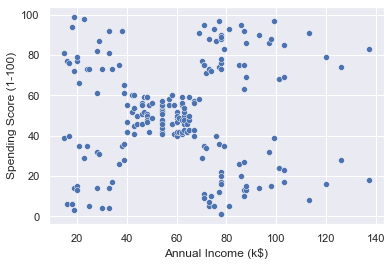

In [9]:
sns.scatterplot(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'])

* Histogram on the Age and Annual Income Distribution

<AxesSubplot:xlabel='Age', ylabel='Count'>

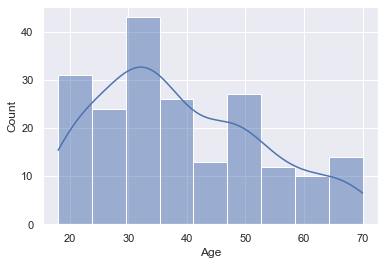

In [10]:
sns.histplot(mall_df['Age'],kde=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

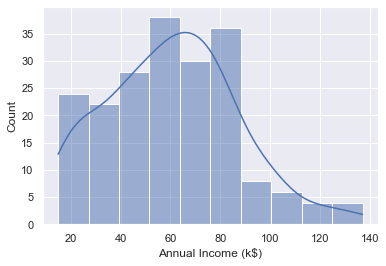

In [11]:
sns.histplot(mall_df['Annual Income (k$)'],kde=True)

* Creating Dummy variables for the object column

In [12]:
mall_dummy = pd.get_dummies(mall_df,columns=['Gender'],drop_first=True)
mall_dummy

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


# Building Clustering Model

In [14]:
#Importing the K-means library from sklearn
from sklearn.cluster import KMeans

* Plotting the Elbow plot to find the optimal number of clusters

In [15]:
error =[]
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(mall_dummy)
    error.append(km.inertia_)

Text(0, 0.5, 'Error of Clusters')

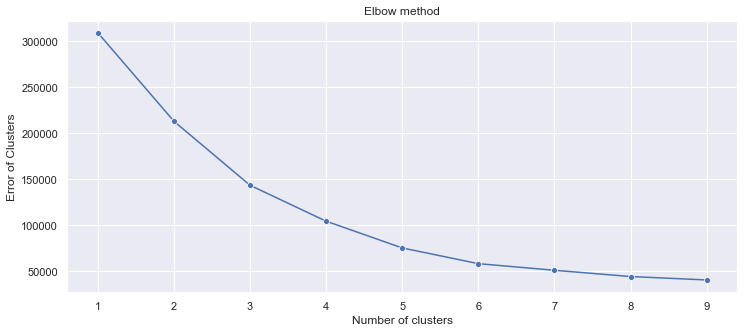

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(range(1,10), error, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Error of Clusters")

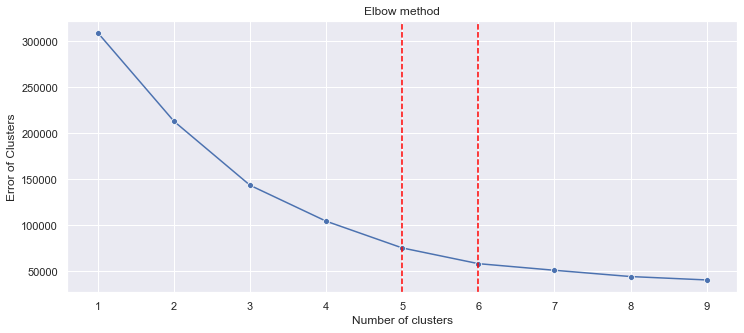

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(range(1,10), error, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Error of Clusters")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")

In [18]:
KMeans_5 = KMeans(n_clusters=5, init='k-means++').fit(mall_dummy)

In [19]:
#Predicting on the same data
clusters= KMeans_5.fit_predict(mall_dummy)

In [20]:
mall['Clusters'] = clusters

In [21]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [22]:
mall['Clusters'].value_counts()

1    79
2    39
0    36
4    23
3    23
Name: Clusters, dtype: int64

In [23]:
mall.groupby('Clusters')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,
0,40.666667,87.750000,17.583333
1,43.088608,55.291139,49.569620
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.521739,26.304348,78.565217


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

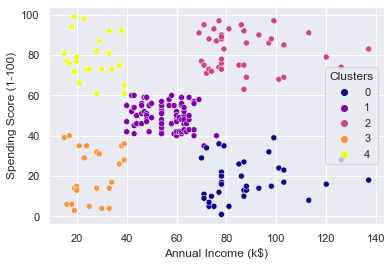

In [24]:
sns.scatterplot(mall['Annual Income (k$)'],mall['Spending Score (1-100)'],hue=mall['Clusters'],palette="plasma")